In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from a CSV file
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

# Display the first few rows of the dataset
print(titanic.head())

# Display the summary of the dataset
print(titanic.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
# Check for missing values
print(titanic.isnull().sum())

# Fill missing values in 'Age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to many missing values
titanic.drop(columns=['Cabin'], inplace=True)

# Convert 'Sex' and 'Embarked' to categorical variables
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')

# Drop the 'Ticket' column as it is not needed for analysis
titanic.drop(columns=['Ticket'], inplace=True)

# Display the cleaned dataset summary
print(titanic.info())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(1)
memory usage: 57.8+ KB
None


C:\Users\mryad\AppData\Local\Temp\ipykernel_18836\1220000657.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\mryad\AppData\Local\Temp\ipykernel_18836\1220000657.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

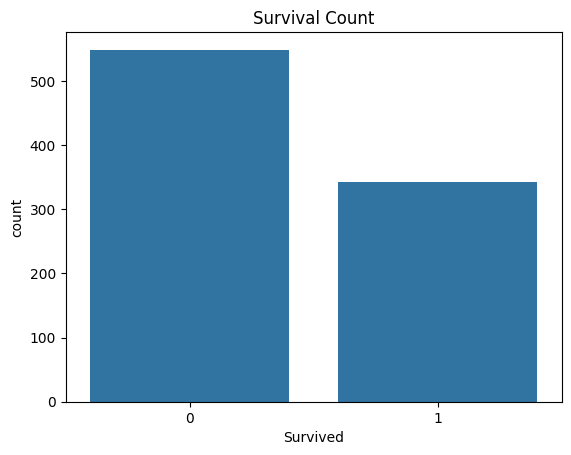

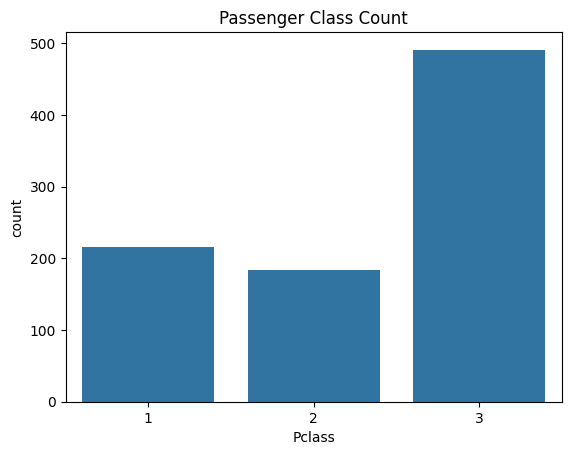

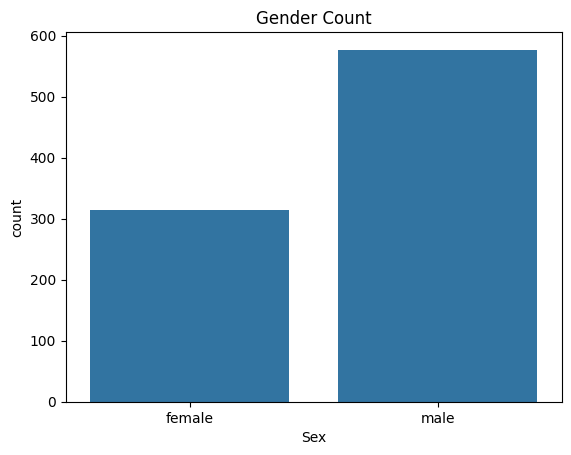

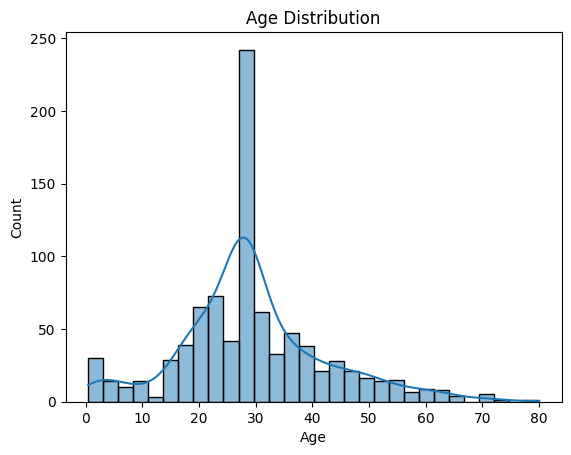

In [3]:
# Distribution of 'Survived'
sns.countplot(data=titanic, x='Survived')
plt.title('Survival Count')
plt.show()

# Distribution of 'Pclass'
sns.countplot(data=titanic, x='Pclass')
plt.title('Passenger Class Count')
plt.show()

# Distribution of 'Sex'
sns.countplot(data=titanic, x='Sex')
plt.title('Gender Count')
plt.show()

# Distribution of 'Age'
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


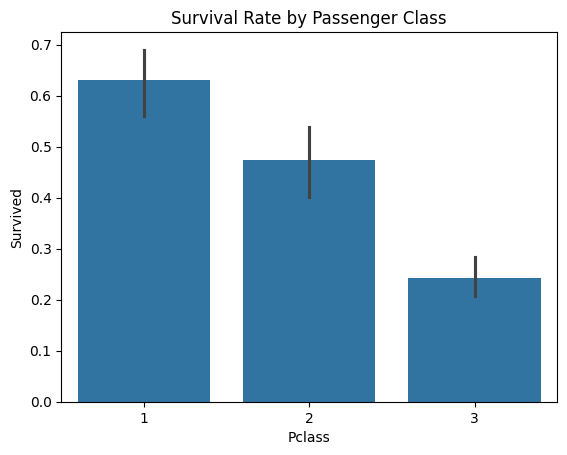

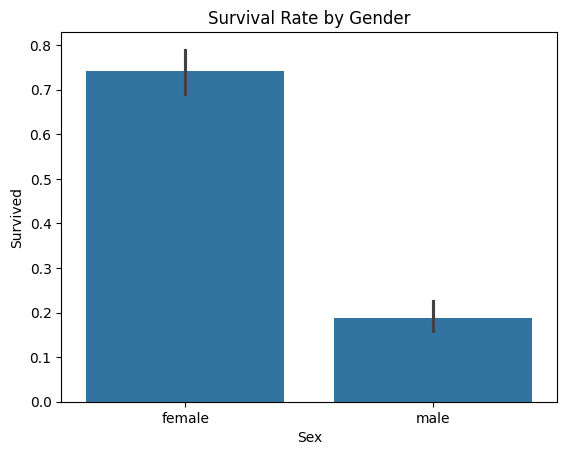

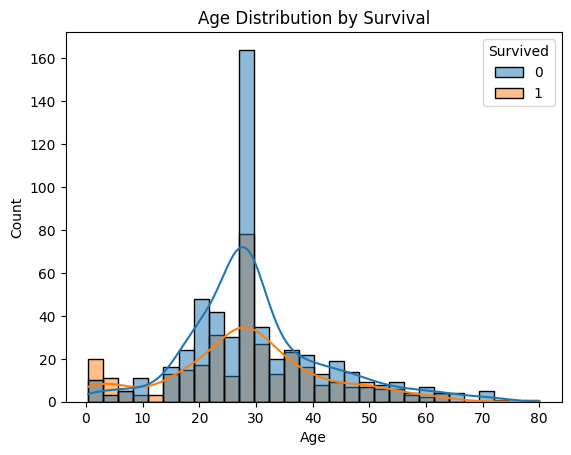

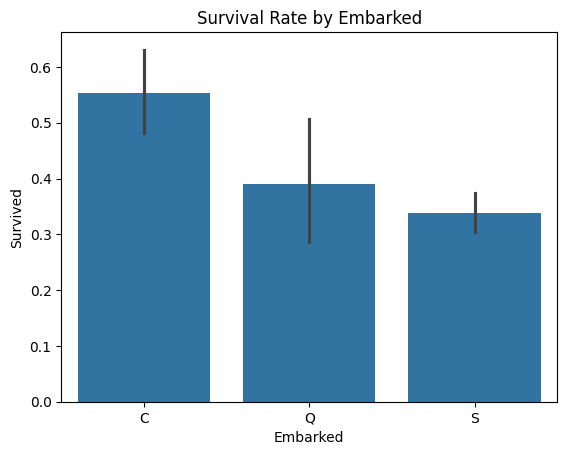

In [4]:
# Survival rate by 'Pclass'
sns.barplot(data=titanic, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by 'Sex'
sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

# Age distribution by 'Survived'
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

# Survival rate by 'Embarked'
sns.barplot(data=titanic, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked')
plt.show()


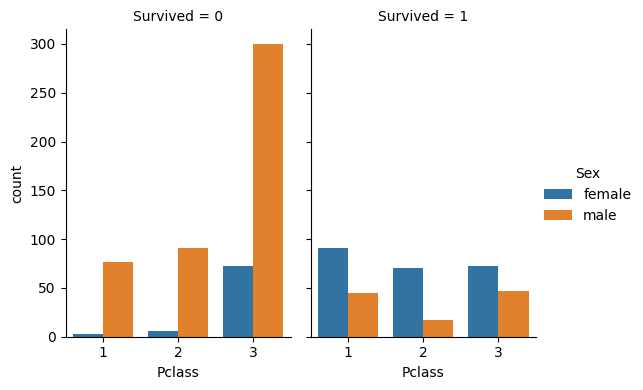

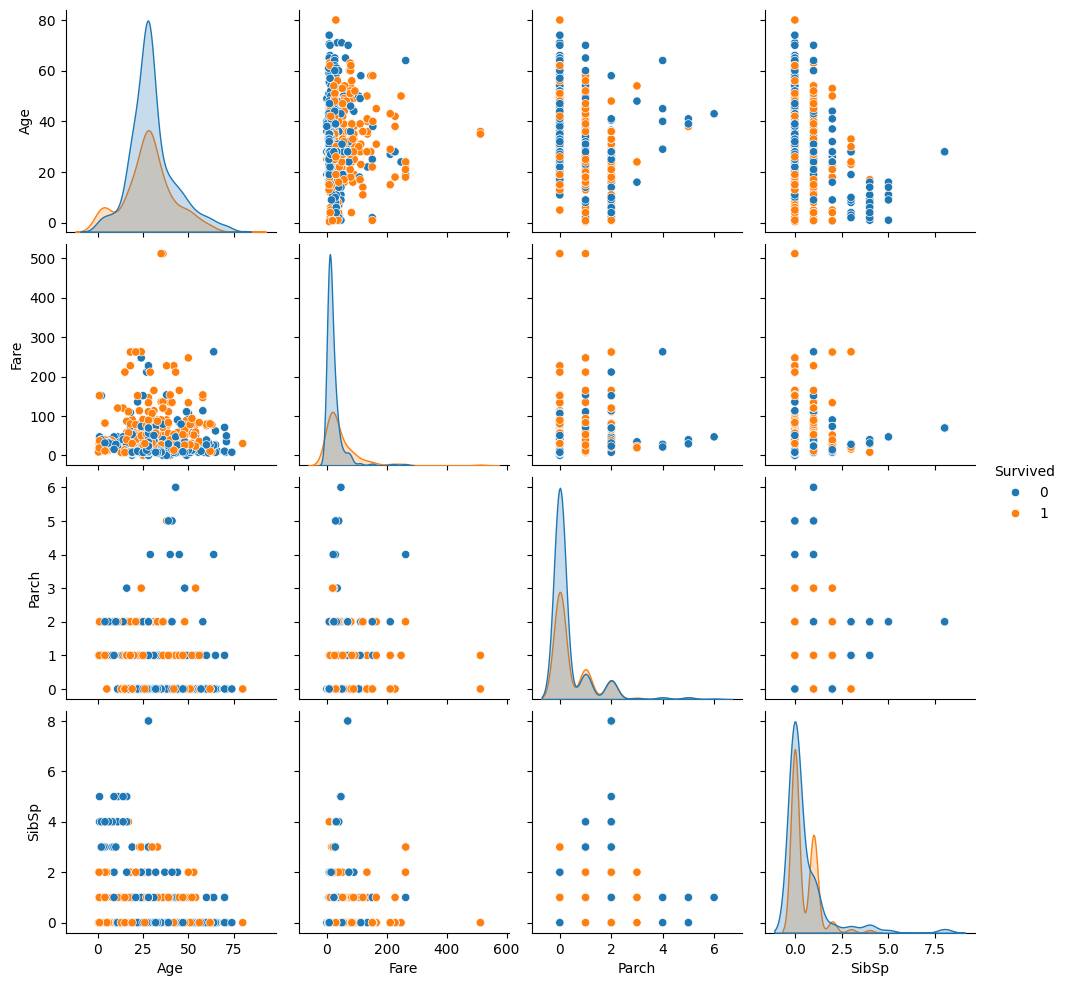

In [5]:
# Survival rate by 'Pclass' and 'Sex'
sns.catplot(data=titanic, x='Pclass', hue='Sex', col='Survived', kind='count', height=4, aspect=0.7)
plt.show()

# Pair plot of numerical variables
sns.pairplot(titanic[['Age', 'Fare', 'Parch', 'SibSp', 'Survived']], hue='Survived')
plt.show()
